In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

('odometer', 0.2082950467068729)

('lat', 0.18672127488614793)

('long', 0.18662450097696767)

('year', 0.1340447120256896)

('manufacturer', 0.09996135786509319)

('size', 0.03852721862934799)

('cylinders', 0.026785944291381005)

('condition', 0.02234244217426378)

('drive', 0.02129349729558164)

('price', 0.02118579882858278)

('type', 0.020777713965165846)

('transmission', 0.015602771089974167)

('fuel', 0.01313232161847703)

('title_status', 0.004705399646454622)

In [37]:
dt = pd.read_csv('./Data/clean_vehicles.csv')[[
    'odometer',
    'lat',
    'long',
    'year',
    'price'
]]

In [38]:
dt

,odometer,lat,long,year,price
0,57923.0,32.590000,-85.480000,2014.0,180874.674367
1,71229.0,32.590000,-85.480000,2010.0,180874.674367
2,19160.0,32.590000,-85.480000,2020.0,180874.674367
3,41124.0,32.590000,-85.480000,2017.0,180874.674367
4,128000.0,32.592000,-85.518900,2013.0,27910.346076
...,...,...,...,...,...
383482,32226.0,33.786500,-84.445400,2019.0,46523.974370
383483,12029.0,33.786500,-84.445400,2020.0,46523.974370
383484,4174.0,33.779214,-84.411811,2020.0,16230.557826
383485,30112.0,33.786500,-84.445400,2018.0,46523.974370


In [39]:
scaler = MinMaxScaler()

dt['year'] = scaler.fit_transform(dt[['year']])

In [40]:
# cols = [
#     'manufacturer',
#     'condition',
#     'cylinders',
#     'size',
# ]

# for i in cols:
#     print(f'{i} --> {dt[i].nunique()}')

# labeler = LabelEncoder()

# for i in cols:
#     dt[i] = labeler.fit_transform(dt[[i]])

In [41]:
dt.head()

,odometer,lat,long,year,price
0,57923.0,32.590,-85.4800,0.934426,180874.674367
1,71229.0,32.590,-85.4800,0.901639,180874.674367
2,19160.0,32.590,-85.4800,0.983607,180874.674367
3,41124.0,32.590,-85.4800,0.959016,180874.674367
4,128000.0,32.592,-85.5189,0.926230,27910.346076


In [42]:
pca = PCA(n_components = 2)
dt_pca =pd.DataFrame(pca.fit_transform(dt))

In [43]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(dt_pca)
dt_pca['clusters'] = kmeans.labels_

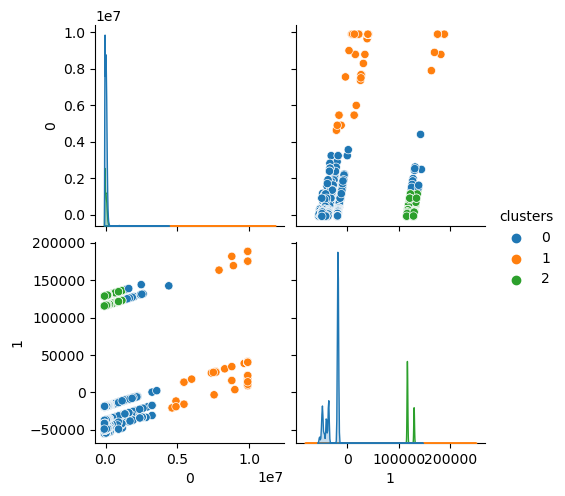

In [44]:
sns.pairplot(dt_pca, hue='clusters', palette=sns.color_palette())

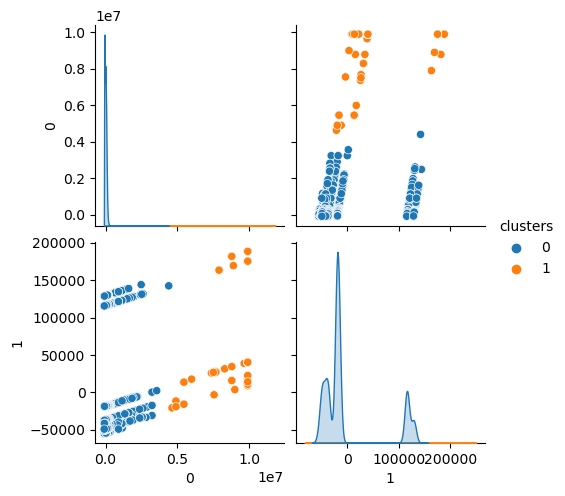

In [50]:
dt2 = dt_pca.drop('clusters', axis=1).copy()

km = KMeans(n_clusters = 2, random_state = 42).fit(dt2)
dt2['clusters'] = km.labels_

sns.pairplot(dt2, hue='clusters', palette=sns.color_palette())

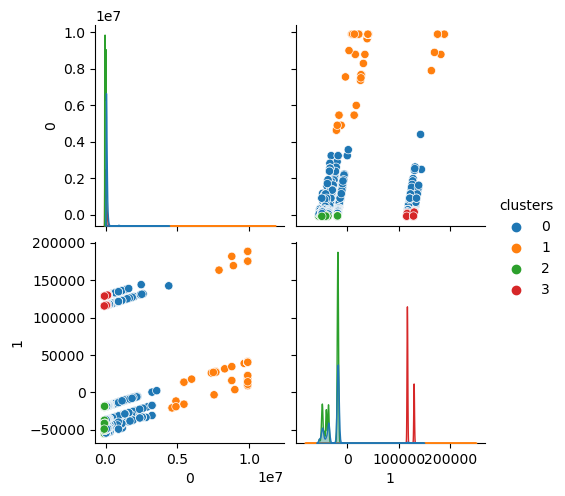

In [51]:
dt3 = dt_pca.drop('clusters', axis=1).copy()

km = KMeans(n_clusters = 4, random_state = 42).fit(dt3)
dt3['clusters'] = km.labels_

sns.pairplot(dt3, hue='clusters', palette=sns.color_palette())